# Session 10: Fama-French Model

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS

Install pandas_datareader to collect data for the Fama-French Three Factor Model.




In [2]:
#pip install pandas_datareader
import pandas_datareader as pdr

Collecting Data for a Fama-French Three Factor model: 
    
For More Information: https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html
   
Expected Excess Return for a portfolio based on three factors. 

Factor 1: Rm - Rf = Excess Market Returns (RF = T-blls)

Factor 2: SMB = Small Minus Big

        - Average retrun on the three small portfolios - average returns on three big portfolios.
    
        - SMB = 1/3 * (Small Value + Small Neural + Small Growth) -  1/3 * (Big Value + Big Neural +   Big Growth).

Factor 3: HML = High Minus Low

        - Average reutn on two value portfolios - average return on two growth portfolios.
    
        - HML = 0.5*(Small Value + Big  Value) -  0.5*(Small Growth +  Big Growth)

        - Big/Small based on market capitalisation | High/Low based on book-to-order ratio

        - RF - column comprising of risk-free rate (T-Bills.)

In [3]:
import warnings
warnings.filterwarnings("ignore")

#Monthly Data for 3 Factor Fama-French Model 
factors = pdr.get_data_famafrench("F-F_Research_Data_Factors", start="01-01-1950")[0]
#factors is dictionary with monthly (index 0) and yearly (index 1) data

industry = pdr.get_data_famafrench("10_Industry_Portfolios", start="01-01-1950")[0]
#Index 0: Average value of weight returns of industry portfolios (monthly)

For more infomration: https://pandas-datareader.readthedocs.io/en/latest/readers/famafrench.html#pandas_datareader.famafrench.FamaFrenchReader.get_available_datasets
    
For more information on how to download different dataset: 
Click on the Link above --> DATA LIBRARY --> download prefered file --> copy name of downloaded file without the extension --> insert in the function above.

Eg: Fama/French 3 Factors (download CSV): Saved as 'F-F_Research_Data_Factors_CSV' , remove '_CSV' and insert 'F-F_Research_Data_Factors'

Correlation Plots: Correlation between Monthly Industrial Returns

In [4]:
import warnings
warnings.filterwarnings("ignore")

industry = pdr.get_data_famafrench("10_Industry_Portfolios", start="01-01-1950")[0]
factors = pdr.get_data_famafrench("F-F_Research_Data_Factors", start="01-01-1950")[0]

#Finding Correlation Matrix 
industry_correlation = industry.corr() #Provides a 10-by-10 correlation matrix
factors_correlation = factors.corr()

print(industry_correlation)
print(factors_correlation)

          NoDur     Durbl     Manuf     Enrgy     HiTec     Telcm     Shops  \
NoDur  1.000000  0.575872  0.804482  0.492280  0.599046  0.628304  0.810445   
Durbl  0.575872  1.000000  0.743249  0.450151  0.640425  0.520946  0.700327   
Manuf  0.804482  0.743249  1.000000  0.630851  0.777570  0.635621  0.812556   
Enrgy  0.492280  0.450151  0.630851  1.000000  0.438002  0.440001  0.430434   
HiTec  0.599046  0.640425  0.777570  0.438002  1.000000  0.599644  0.728538   
Telcm  0.628304  0.520946  0.635621  0.440001  0.599644  1.000000  0.627570   
Shops  0.810445  0.700327  0.812556  0.430434  0.728538  0.627570  1.000000   
Hlth   0.733032  0.466794  0.709218  0.429150  0.630364  0.531115  0.661581   
Utils  0.638134  0.390550  0.551418  0.508274  0.363515  0.517951  0.487844   
Other  0.812380  0.715539  0.893537  0.606567  0.716259  0.662644  0.817308   

          Hlth      Utils     Other  
NoDur  0.733032  0.638134  0.812380  
Durbl  0.466794  0.390550  0.715539  
Manuf  0.709218 

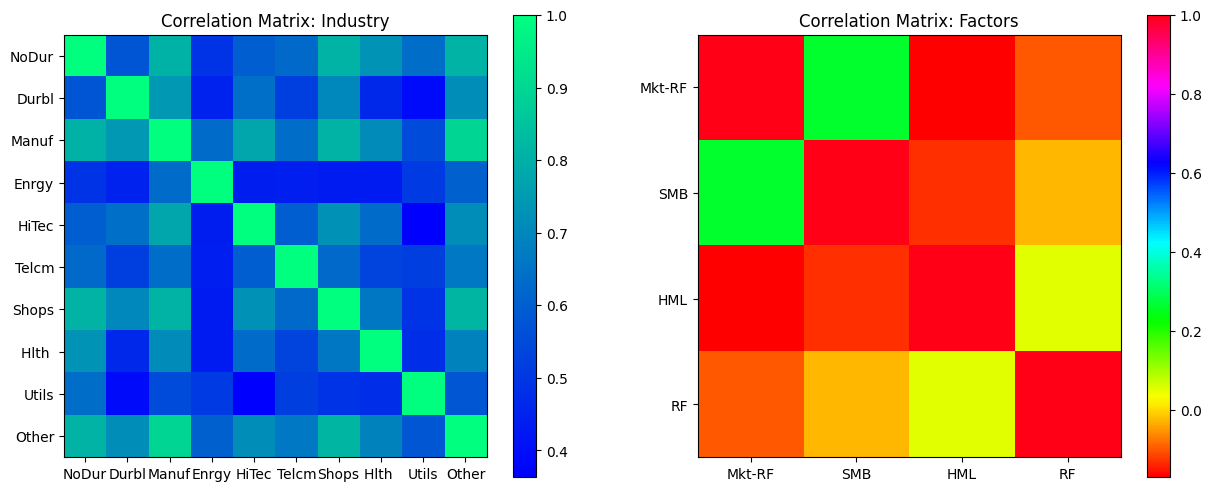

In [5]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15,6))

ax_corr_ind= ax1.imshow(industry_correlation, cmap = 'winter')
ax1.set_xticks(np.arange(len(industry_correlation)), labels=industry_correlation.columns)
ax1.set_yticks(np.arange(len(industry_correlation)), labels=industry_correlation.columns)
ax1.set_title('Correlation Matrix: Industry')
plt.colorbar(ax_corr_ind, ax = ax1)

ax_corr_fact = ax2.imshow(factors_correlation, cmap = 'hsv')
ax2.set_xticks(np.arange(len(factors_correlation)), labels=factors_correlation.columns)
ax2.set_yticks(np.arange(len(factors_correlation)), labels=factors_correlation.columns)
ax2.set_title('Correlation Matrix: Factors')
plt.colorbar(ax_corr_fact, ax = ax2)
#For more information: https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html#sphx-glr-gallery-images-contours-and-fields-image-annotated-heatmap-py


OLS: Fama-French Regression 

In [6]:
import pandas as pd
import pandas_datareader as pdr
import statsmodels.api as sm 

import warnings
warnings.filterwarnings("ignore")

industry = pdr.get_data_famafrench("10_Industry_Portfolios", start="01-01-1950")[0]
factors = pdr.get_data_famafrench("F-F_Research_Data_Factors", start="01-01-1950")[0]

FamFren_3F = pd.merge(left = industry, right = factors, left_on = 'Date', right_on = 'Date')
FamFren_3F.columns

#For this example: Consider the Energy Sector
FamFren_3F['Enrgy-RF'] = FamFren_3F['Enrgy'] - FamFren_3F['RF'] #Find excess returns in the sector

Y = FamFren_3F['Enrgy-RF']
X = FamFren_3F[['Mkt-RF', 'SMB', 'HML']]
X = sm.add_constant(X)
regression_model = sm.OLS(Y, X)
results = regression_model.fit()
Parameters = results.params #parameter value
T_values = results.tvalues #tvalues: two-tailed 5% 
P_valuess = results.pvalues #p-values
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               Enrgy-RF   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     291.0
Date:                Thu, 21 Nov 2024   Prob (F-statistic):          9.78e-132
Time:                        20:03:47   Log-Likelihood:                -2544.0
No. Observations:                 897   AIC:                             5096.
Df Residuals:                     893   BIC:                             5115.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0038      0.141      0.027      0.9

Calculating P-values from t-dist (2-sided t-test)

In [7]:
from scipy.stats import t 

import warnings
warnings.filterwarnings("ignore")

df = len(Y) - 4 # n = len(Y), k = 4
p_value_calc = []
for i in range(len(T_values)):
    p_value_calc.append(2*(1-t.cdf(abs(T_values[i]), df))) 

print(p_value_calc)
#compute p_values from each t-stat.
#t.cdf -- cumulative distribution function (t-dist).

[0.9783050395462773, 0.0, 0.0027106459690098283, 0.0]


Bar Plots: Coefficients for All sectors. 

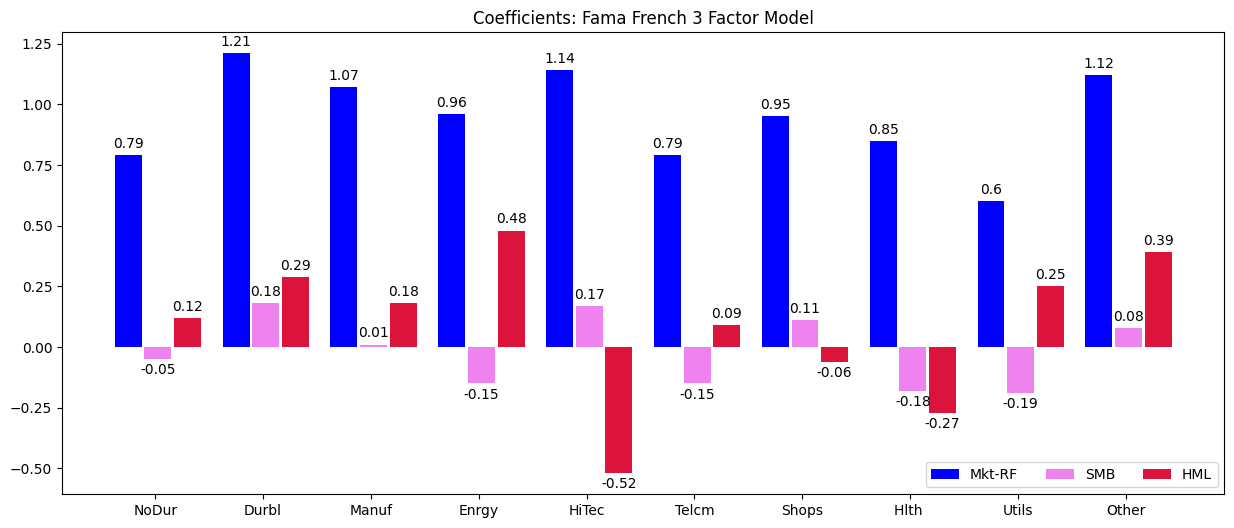

In [ ]:
import pandas as pd
import pandas_datareader as pdr
import statsmodels.api as sm 
from statsmodels.regression.rolling import RollingOLS
import matplotlib.pyplot as plt
import numpy as np


import warnings
warnings.filterwarnings("ignore")


industry = pdr.get_data_famafrench("10_Industry_Portfolios", start="01-01-1950")[0]
factors = pdr.get_data_famafrench("F-F_Research_Data_Factors", start="01-01-1950")[0]

FamFren_3F = pd.merge(left = industry, right = factors, left_on = 'Date', right_on = 'Date')
FamFren_3F.columns

Coeff = []
T_Val = []
for i in range(len(industry.columns)):
    Ind_R = industry[industry.columns[i]] - factors['RF']
    Y = Ind_R
    X = FamFren_3F[['Mkt-RF', 'SMB', 'HML']]
    X = sm.add_constant(X)
    regression_model = sm.OLS(Y, X)
    results = regression_model.fit()
    coeff = pd.DataFrame([industry.columns[i]])
    coeff.rename(columns = {0:'Industry'}, inplace = True)
    coeff[['Intercept', 'Mkt-RF', 'SMB', 'HML']] = round(results.params,2)
    t_val = pd.DataFrame([industry.columns[i]])
    t_val.rename(columns = {0:'Industry'}, inplace = True)
    t_val[['Intercept', 'Mkt-RF', 'SMB', 'HML']] = round(results.tvalues,2)
    Coeff.append(coeff)
    T_Val.append(t_val)
    
   
Coeff = pd.concat(Coeff)    


X_axis = np.arange(len(Coeff)) #For Label Locations
width = 0.25 #bar width 
multiplier = 0

color = ['blue', 'violet', 'crimson']

fig, ax = plt.subplots(figsize = (15, 6))
for i in range(2, len(Coeff.columns)):  #index for i starts from 2 (Coeff index 2 == Mft-Rf)
    offset = width * multiplier #distance between the bars, on the same x-axis label location
    bar = ax.bar(X_axis + offset, Coeff[Coeff.columns[i]],  width, label = Coeff.columns[i], color = color[i-2]) #color index start from 0, hence i-2
    ax.bar_label(bar, padding =3)
    multiplier +=1.1

ax.set_title('Coefficients: Fama French 3 Factor Model')
ax.set_xticks(X_axis + width, Coeff['Industry']) #rename x-axis labels
ax.legend(loc=4, ncol = 3)
plt.show()

Rolling Regression: Plotting Coefficients 

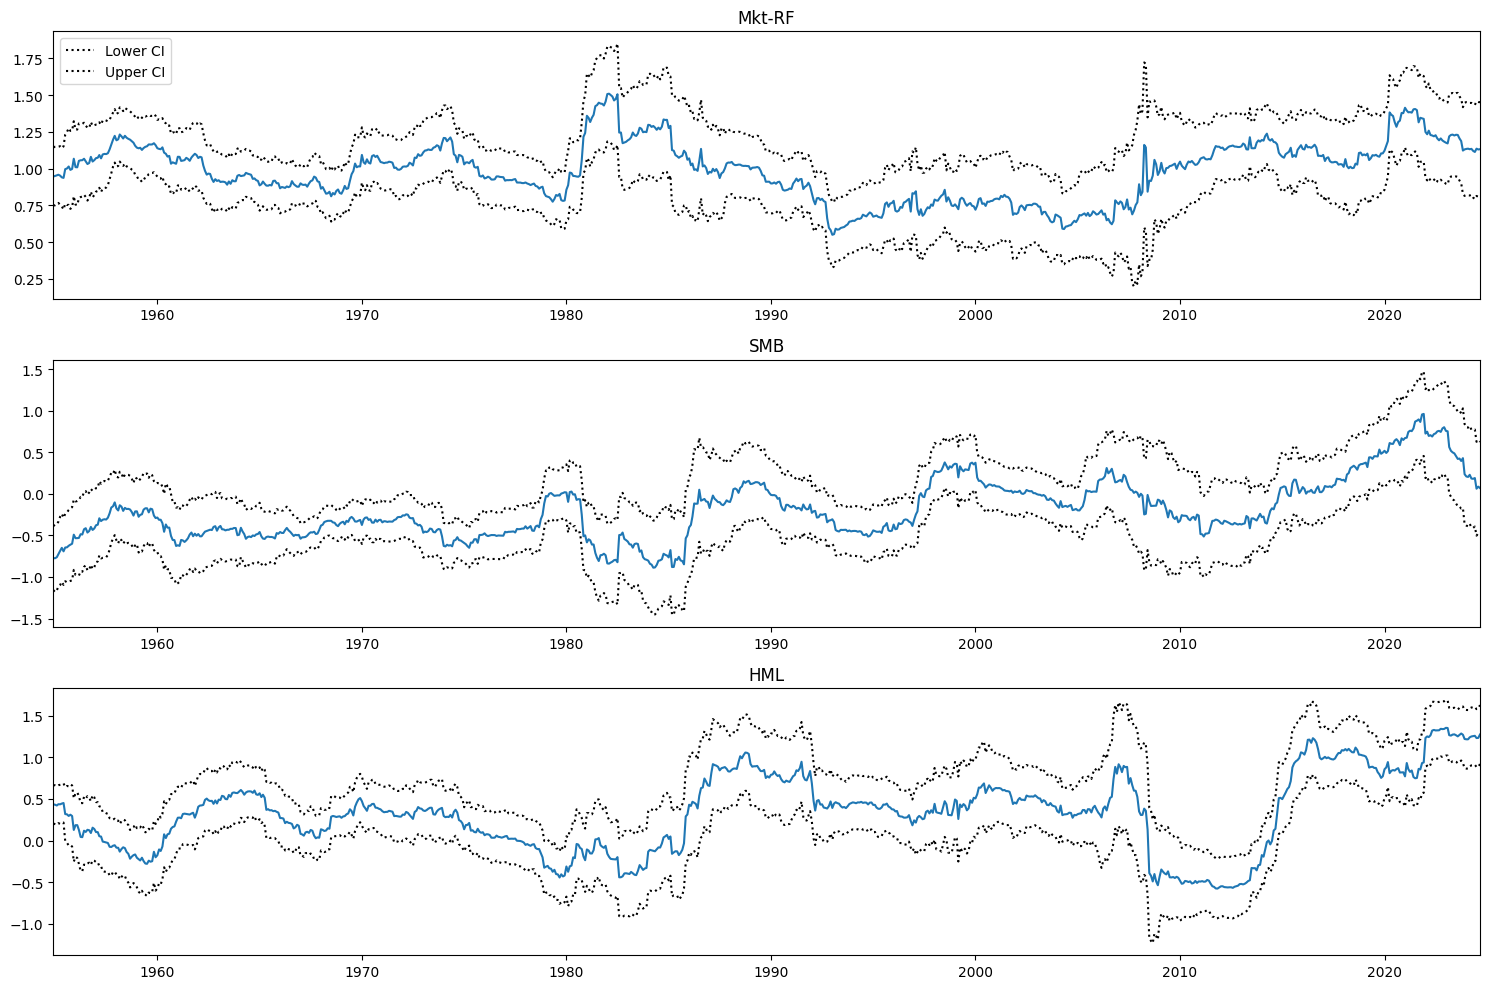

In [9]:

#%% Rolling Regression: Plotting Coefficients 

import pandas as pd
import pandas_datareader as pdr
import statsmodels.api as sm 
from statsmodels.regression.rolling import RollingOLS


import warnings
warnings.filterwarnings("ignore")

industry = pdr.get_data_famafrench("10_Industry_Portfolios", start="01-01-1950")[0]
factors = pdr.get_data_famafrench("F-F_Research_Data_Factors", start="01-01-1950")[0]

FamFren_3F = pd.merge(left = industry, right = factors, left_on = 'Date', right_on = 'Date')
FamFren_3F.columns

#For this example: Consider the Energy Sector
FamFren_3F['Enrgy-RF'] = FamFren_3F['Enrgy'] - FamFren_3F['RF'] #Find excess returns in the sector

Y = FamFren_3F['Enrgy-RF']
X = FamFren_3F[['Mkt-RF', 'SMB', 'HML']]
X = sm.add_constant(X)
regression_model = RollingOLS(Y, X, window = 60) #window size = 60 months (5 years)
results = regression_model.fit()

#plotting using plot_recursive_coefficient (no need to save coefficients)
fig = results.plot_recursive_coefficient(variables = ['Mkt-RF', 'SMB', 'HML'], figsize = (15, 10))
#automatically provides three plots for each coefficient with confidence intervals. 
#For More Information: https://www.statsmodels.org/dev/generated/statsmodels.regression.rolling.RollingRegressionResults.plot_recursive_coefficient.html

Rolling Regression: Plotting Coefficients with Confidence Intervals for all Industries.

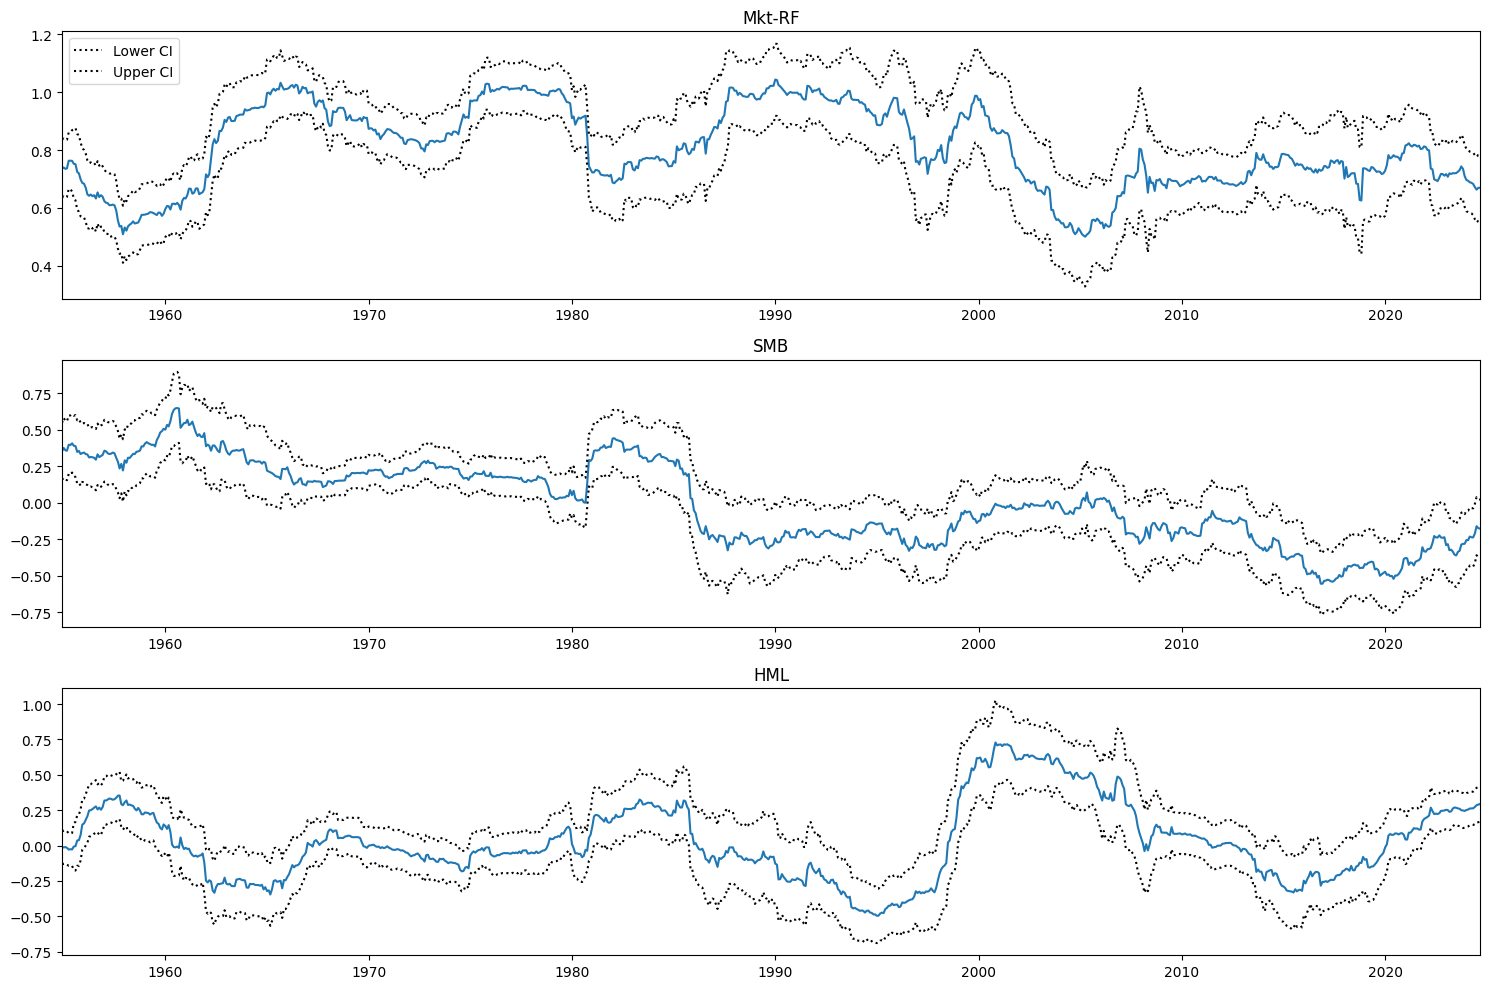

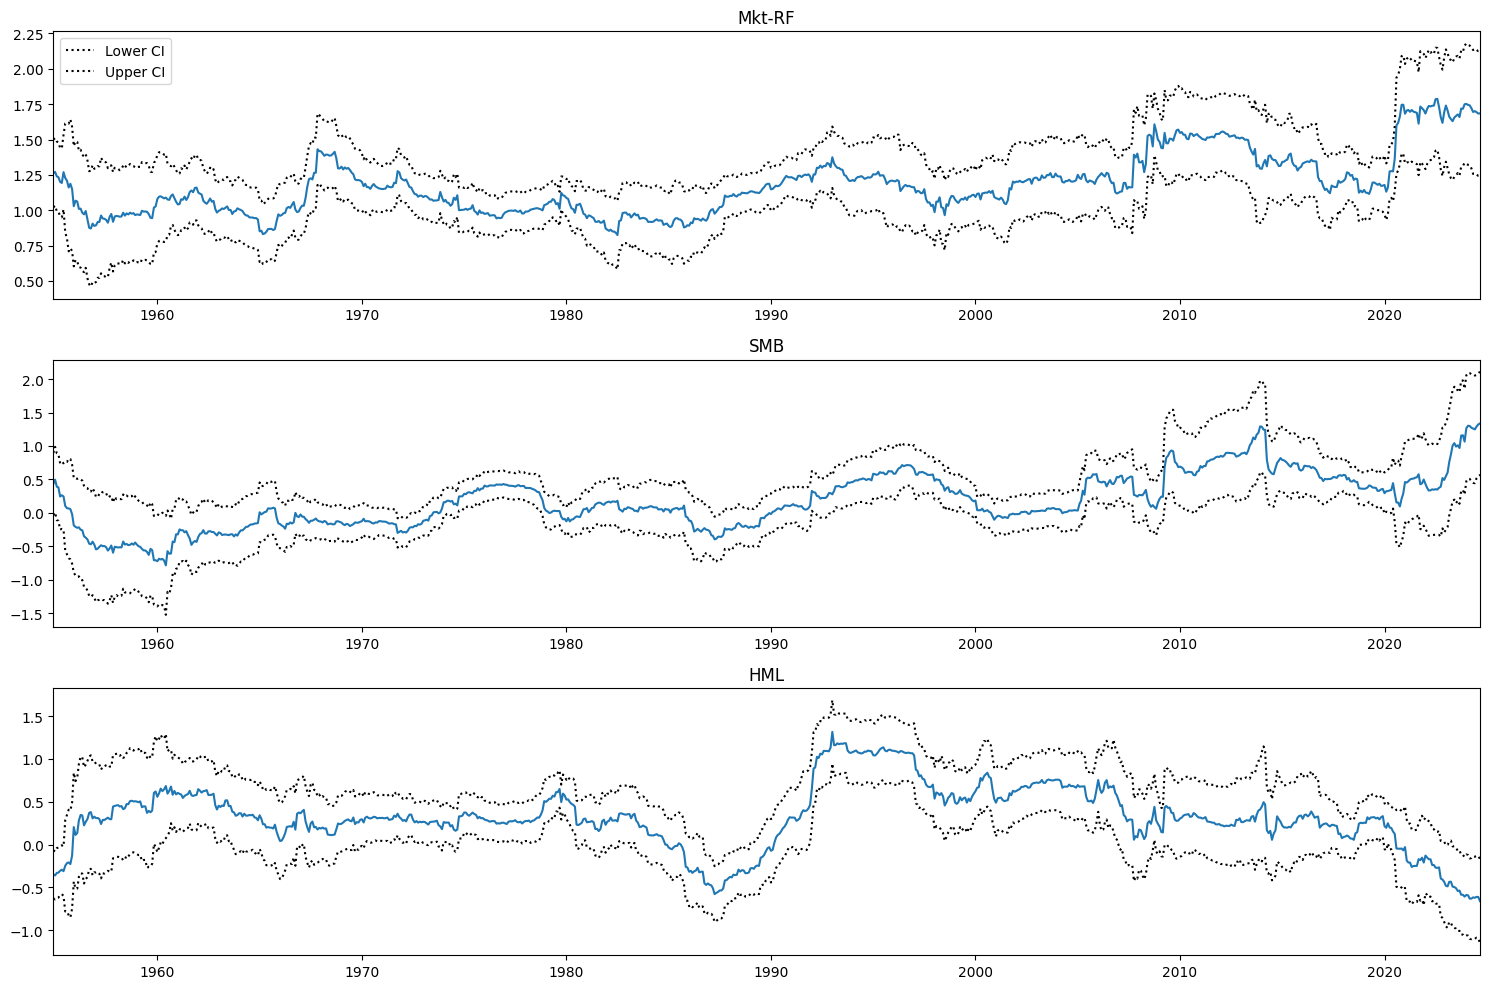

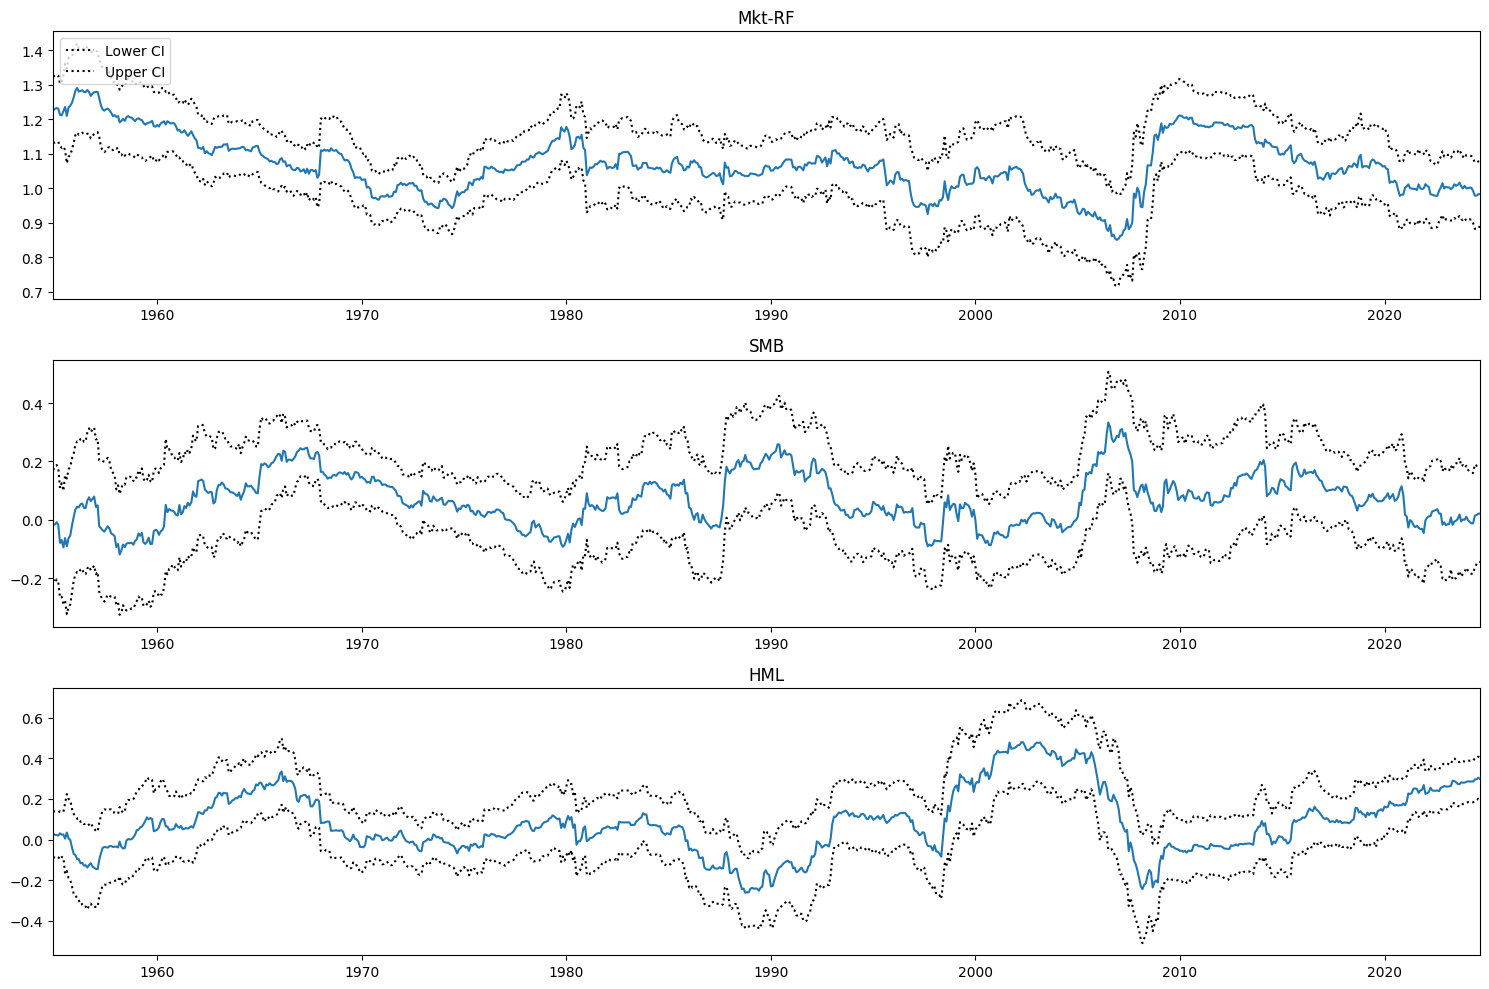

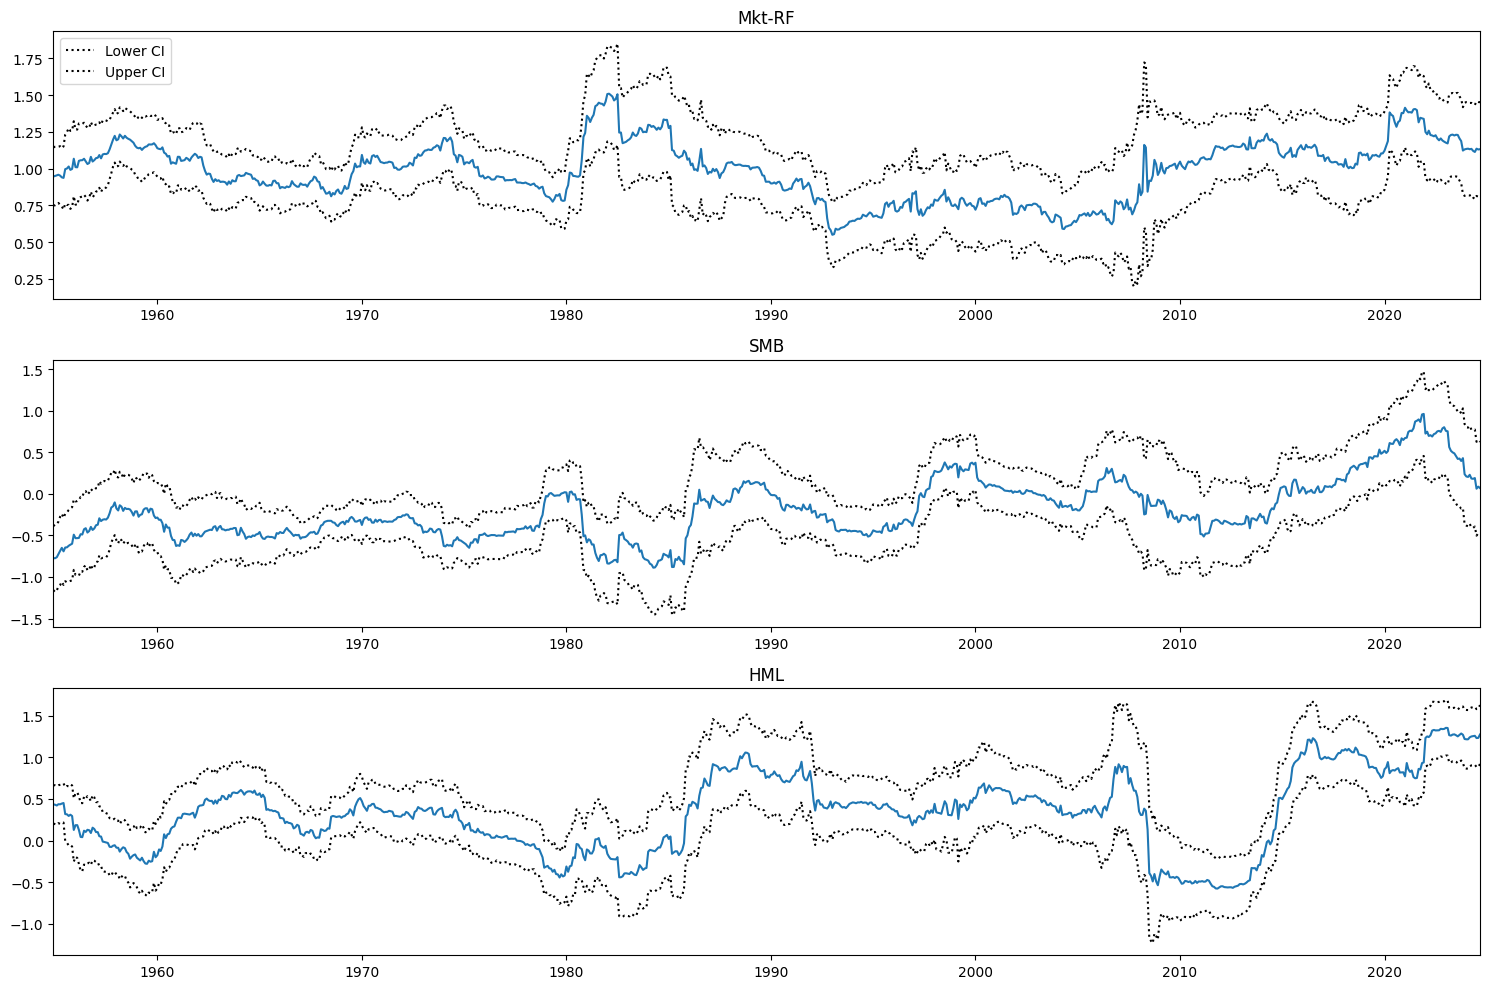

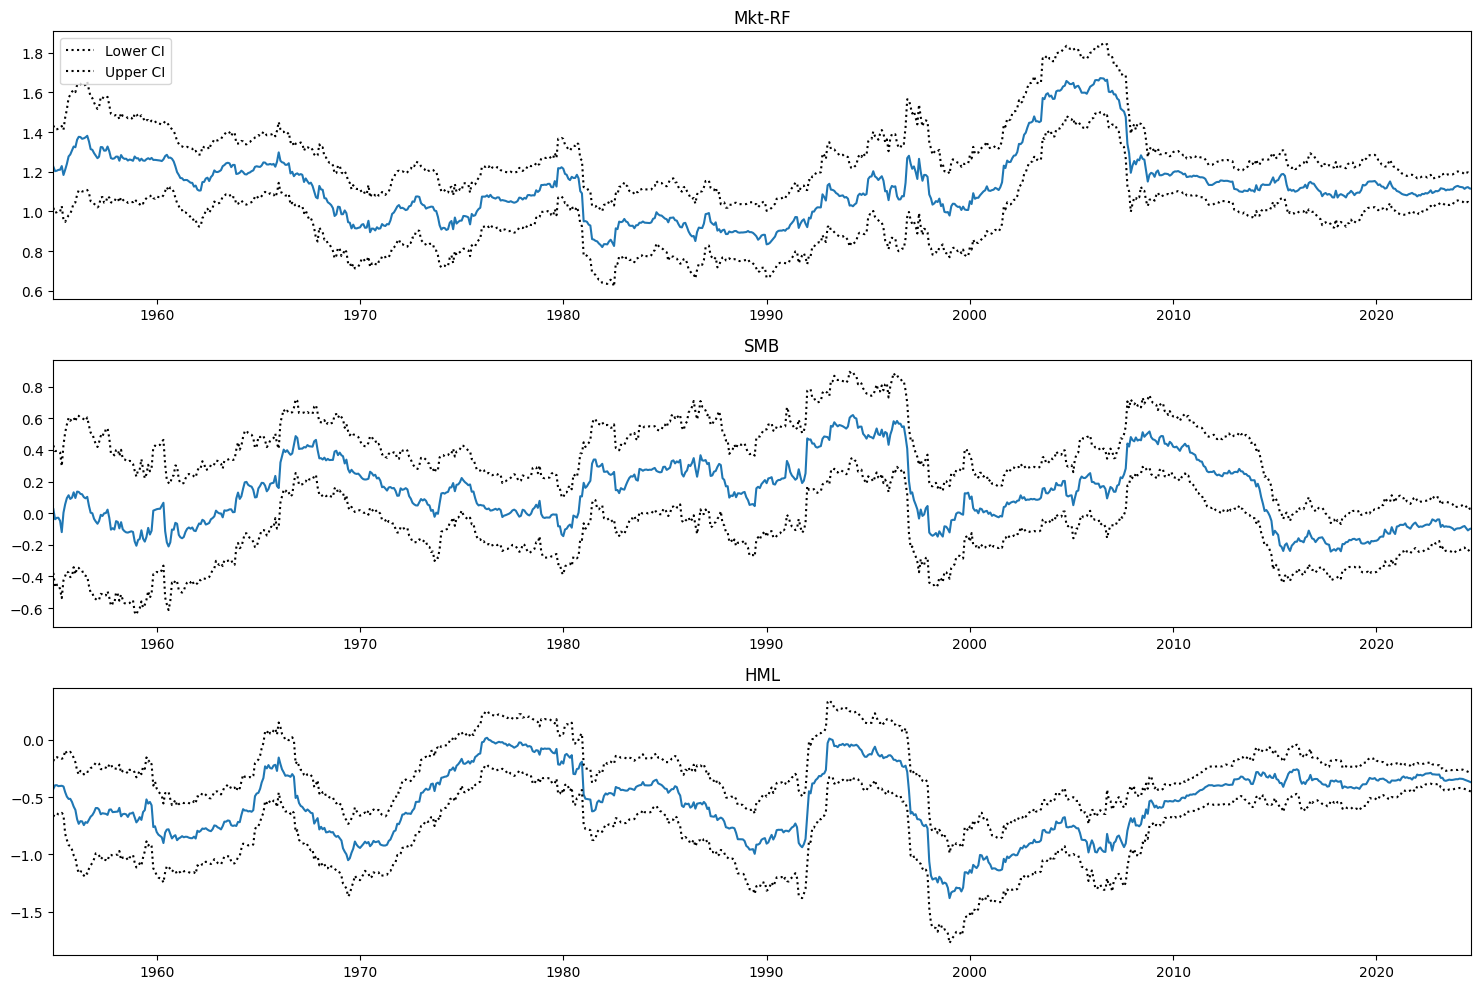

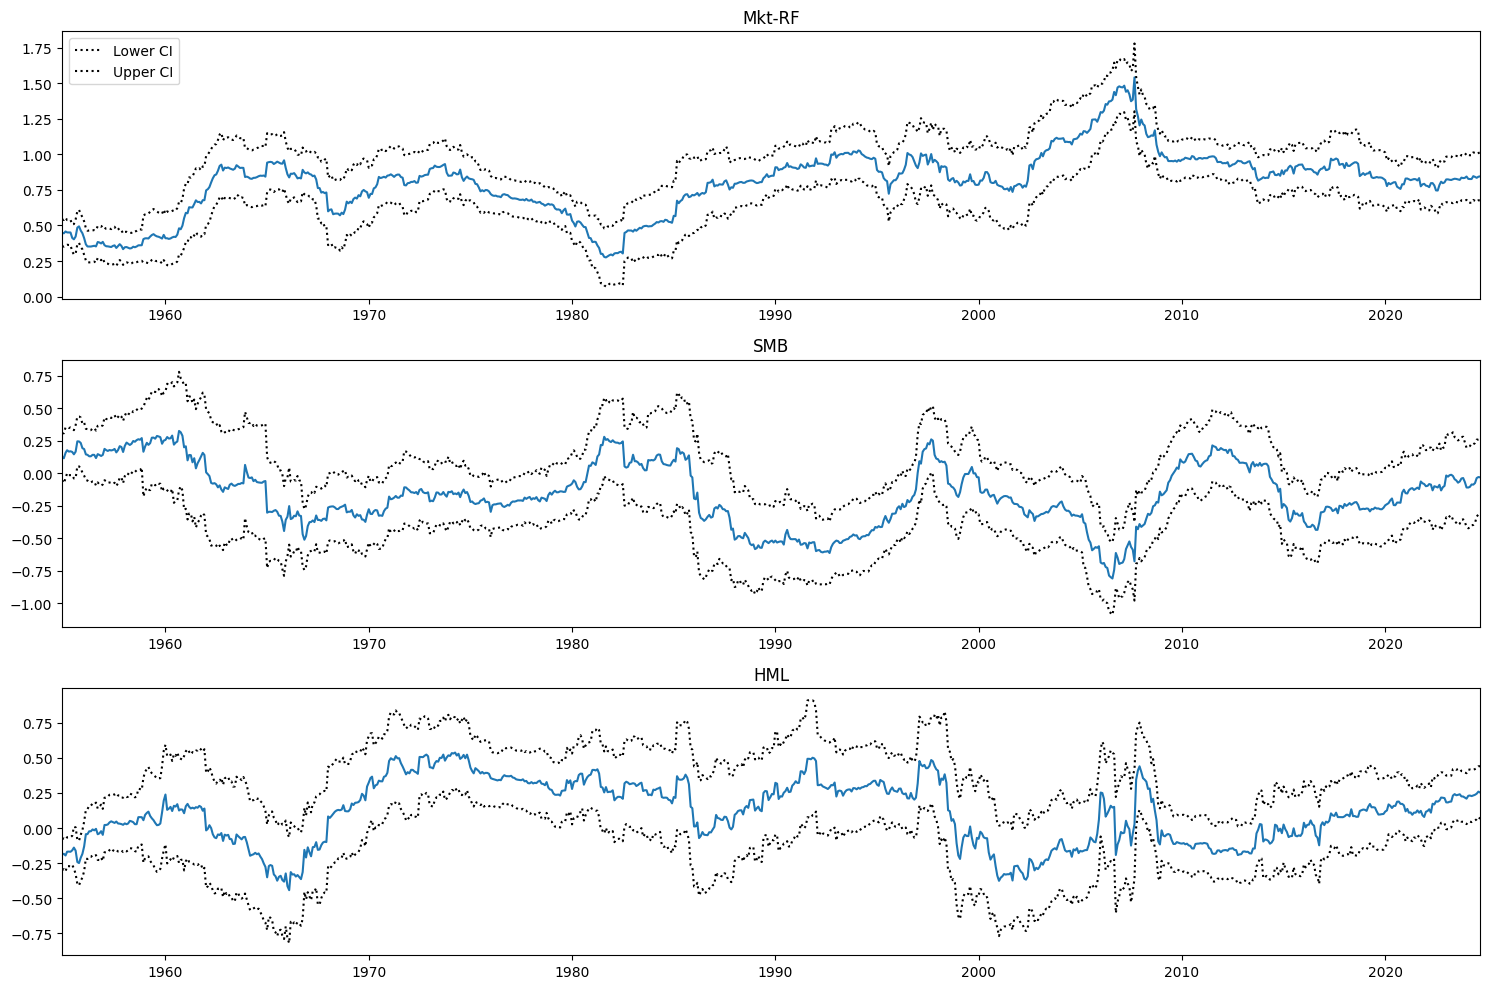

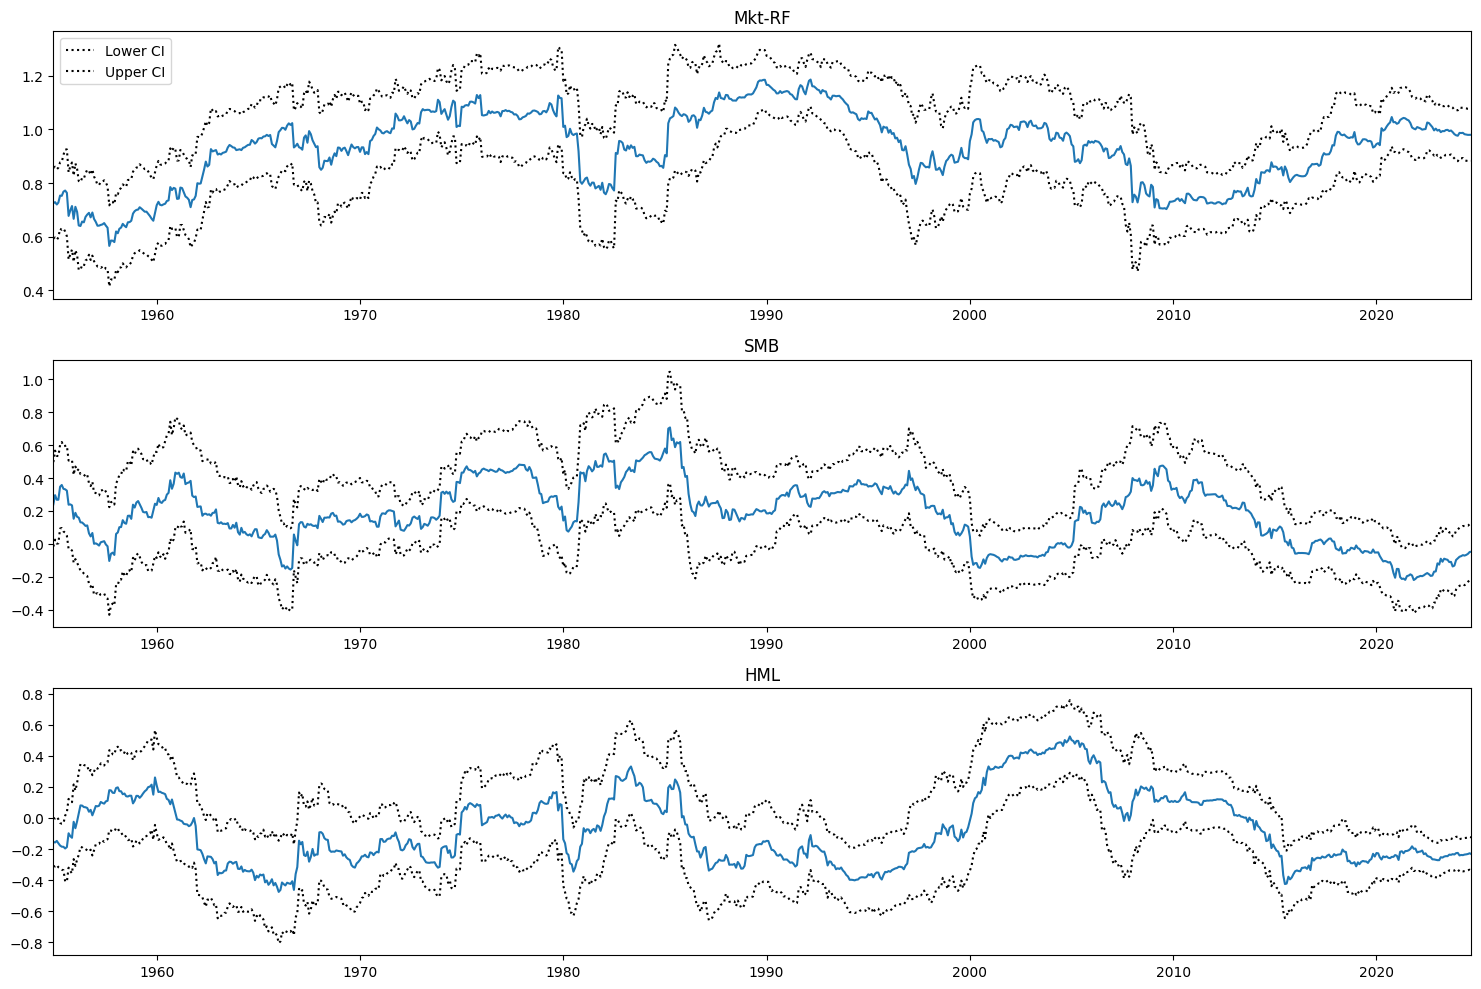

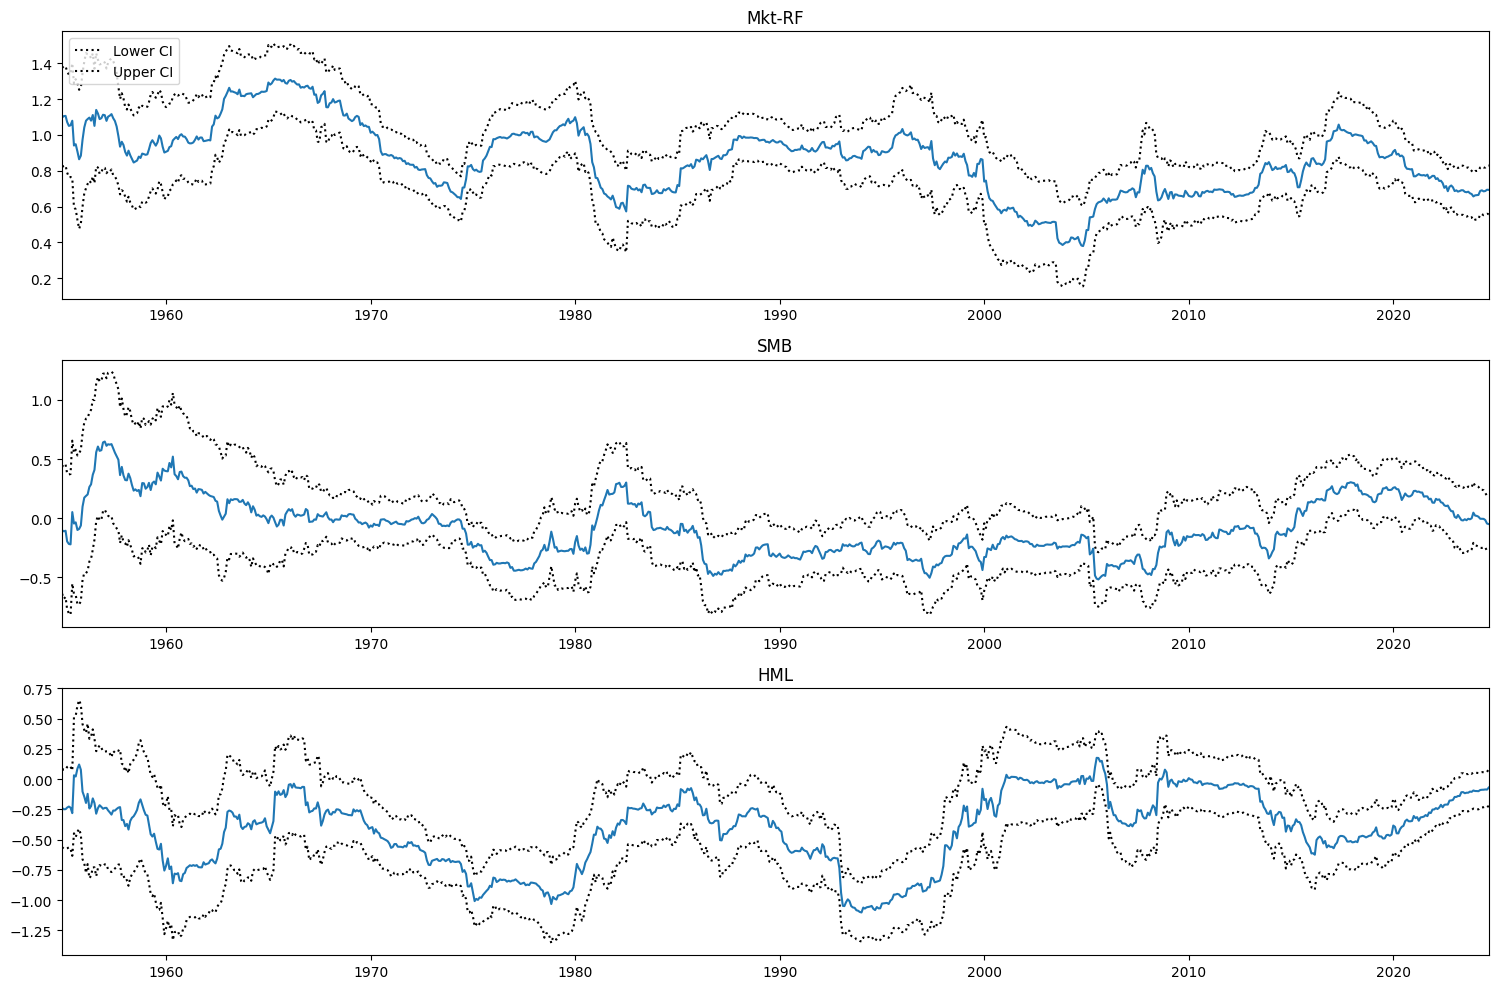

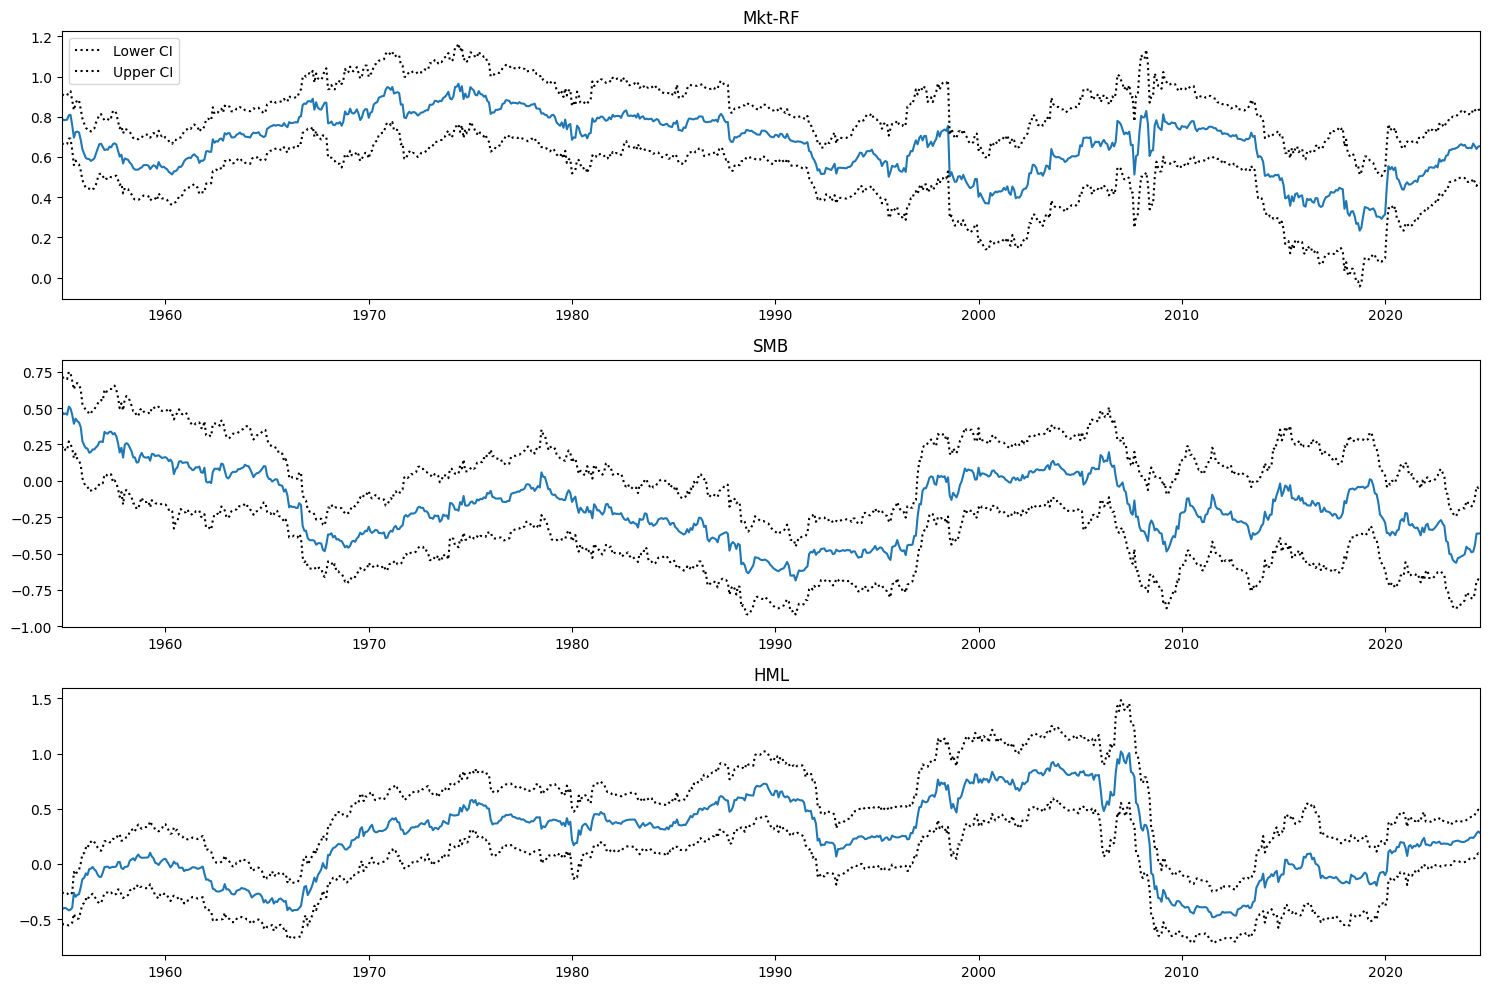

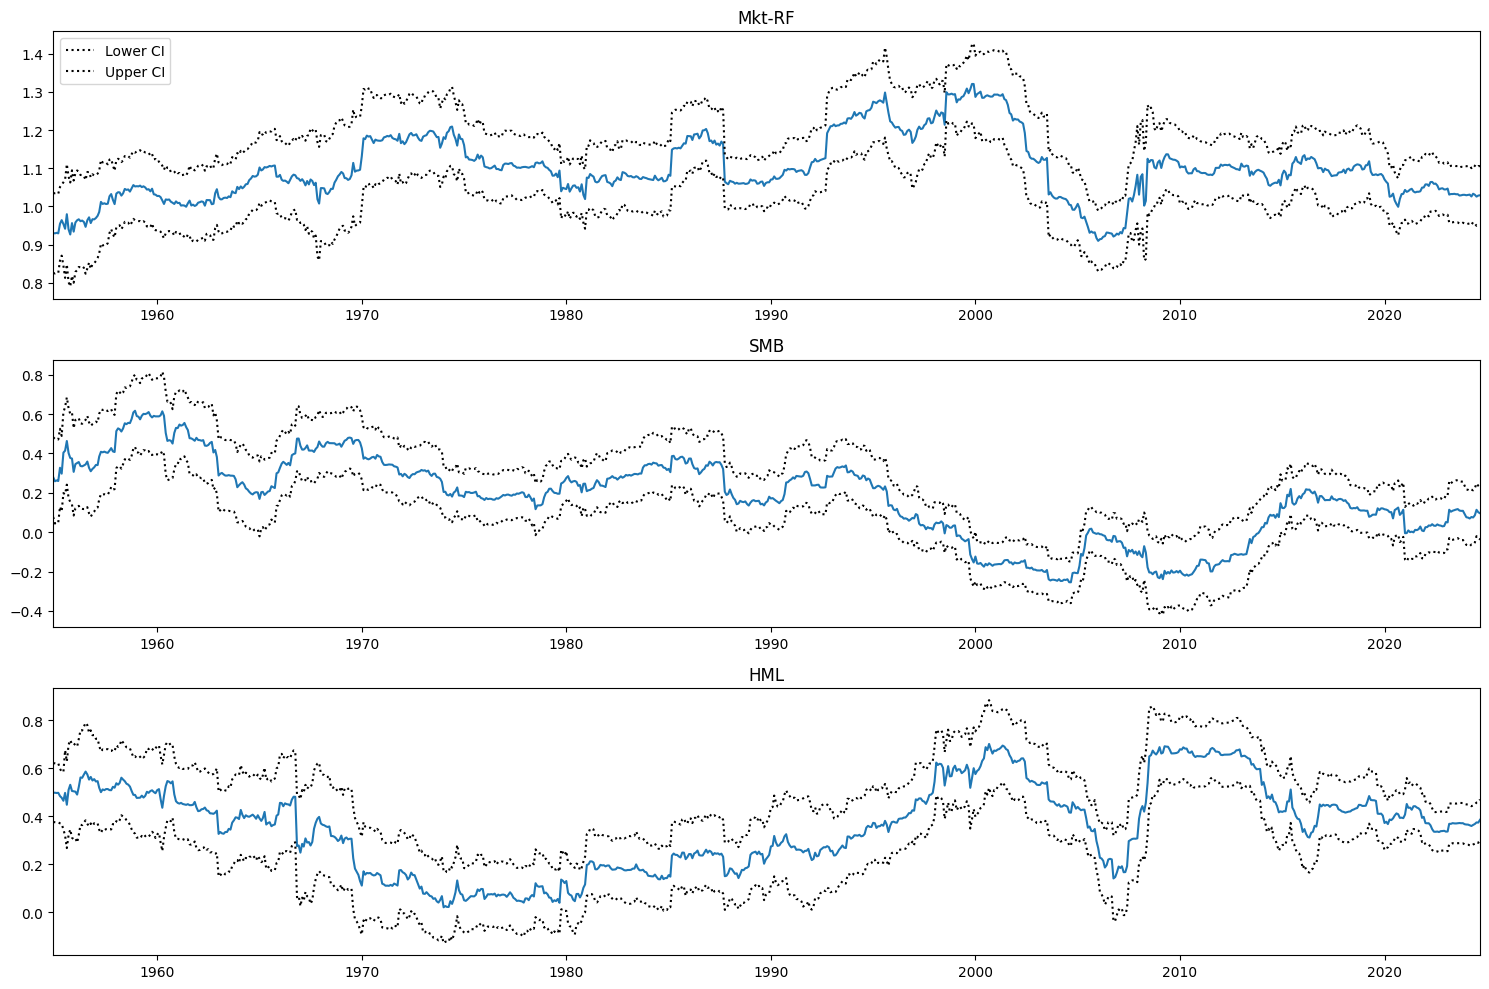

In [10]:

import pandas as pd
import pandas_datareader as pdr
import statsmodels.api as sm 
from statsmodels.regression.rolling import RollingOLS
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

industry = pdr.get_data_famafrench("10_Industry_Portfolios", start="01-01-1950")[0]
factors = pdr.get_data_famafrench("F-F_Research_Data_Factors", start="01-01-1950")[0]

FamFren_3F = pd.merge(left = industry, right = factors, left_on = 'Date', right_on = 'Date')
FamFren_3F.columns

Coeff = []
T_Val = []
for i in range(len(industry.columns)):
    Ind_R = industry[industry.columns[i]] - factors['RF']
    Y = Ind_R
    X = FamFren_3F[['Mkt-RF', 'SMB', 'HML']]
    X = sm.add_constant(X)
    regression_model = RollingOLS(Y, X, window = 60) #window size = 60 months (5 years)
    results = regression_model.fit()
    fig = results.plot_recursive_coefficient(variables = ['Mkt-RF', 'SMB', 'HML'], figsize = (15, 10))
    plt.savefig(str(industry.columns[i] + '_Rolling_Coeff_Plot.png'))